# Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/wineqr/wineqr.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler

y = df["quality"]
x = df.drop("quality", axis=1)
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns, index=x.index)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


<AxesSubplot: >

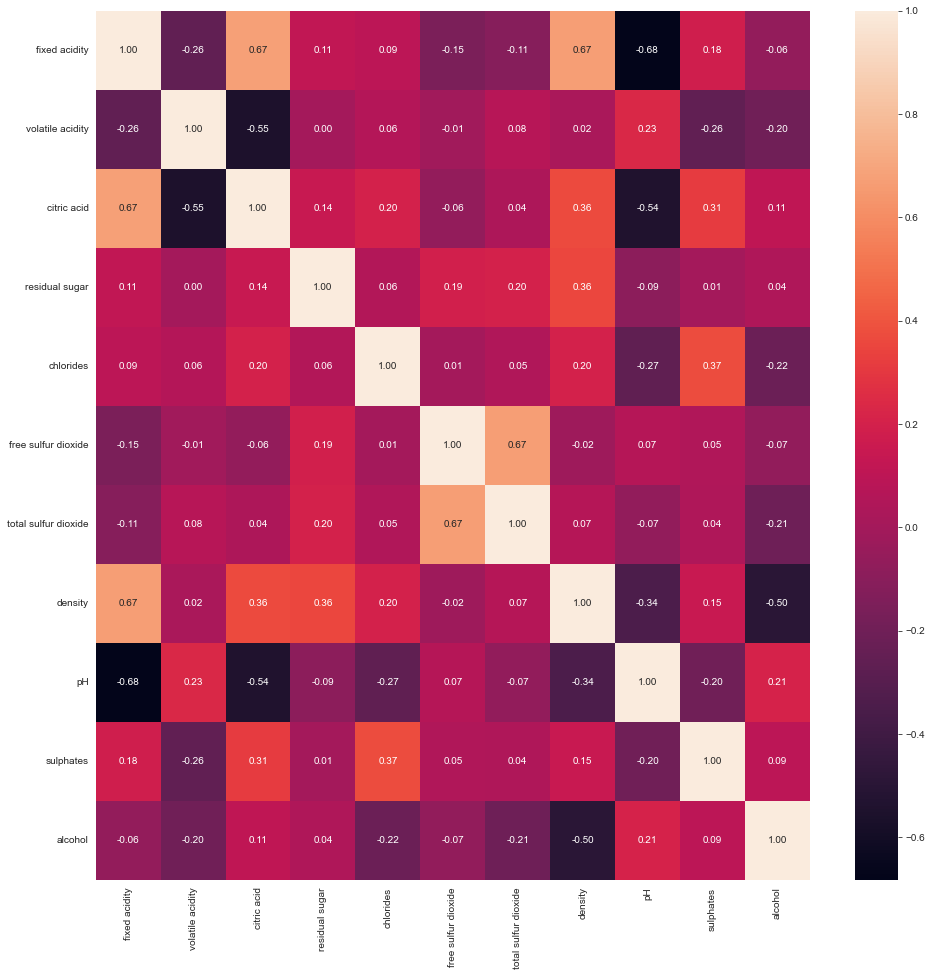

In [5]:
plt.figure(figsize=(16,16))
sns.heatmap(x.corr(), annot=True, fmt='.2f')

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=10)

# Метрики

## Коэффициент Силуэтта

К-т Силуэтта (англ *Silhouette*) - это метрика, которая не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации.

Интуитивное описание метрики:
* точки внутри кластера должны лежать очень близко друг к другу, то есть кластер должен быть *плотным*
* сами кластера должны лежать как можно дальше друг от друга

Метрика силуэта позволяет учитывать оба этих факта в одной формуле.

$
s = \frac{b-a}{\max(a,b)}
$

In [23]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4).fit(x_train)

import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x_train, model.labels_)

print("Качество кластеризации по метрике силуэтта %.3f" % score)

Качество кластеризации по метрике силуэтта 0.204


## Adjusted Mutual Information

Иногда в задаче кластеризации мы всё-таки знаем “правильные” метки кластеров - например, для разметки можно привлечь помощников. Если “истинная” метка кластера нам известна, то можно применять такую метрику как Скорректированная взаимная информация (Adjusted Mutual Information).
По сути эта метрика сравнивает два вероятностных распределения меток кластеров - истинное распределение и то, которое получили в результате кластеризации, про эту метрику есть подробная статья на википедии, с понятием кластеризации мы уже встречались в модуле 5, когда говорили про деревья решений.

In [26]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

model = KMeans(n_clusters=4).fit(x_train)
score = adjusted_mutual_info_score(y_train, model.labels_, average_method='arithmetic')

print("Качество кластеризации по метрике AMI %.3f" % score)

Качество кластеризации по метрике AMI 0.067


## Euclidean distances

cluster_num 1, metric 3882.5306805871865
cluster_num 2, metric 3477.885380534255
cluster_num 3, metric 3244.847845709214
cluster_num 4, metric 3115.946817386831
cluster_num 5, metric 2951.230991392823
cluster_num 6, metric 2869.1023443718723
cluster_num 7, metric 2756.5980164988155
cluster_num 8, metric 2718.221449886012
cluster_num 9, metric 2655.4506629633142
cluster_num 10, metric 2600.14181964766
cluster_num 11, metric 2554.0313434705135
cluster_num 12, metric 2517.7129593157647
cluster_num 13, metric 2472.0617225142305
cluster_num 14, metric 2463.0786916579023
cluster_num 15, metric 2409.965555787781
cluster_num 16, metric 2390.475866150115
cluster_num 17, metric 2378.125642490588
cluster_num 18, metric 2351.6144573340716
cluster_num 19, metric 2336.9941034700005
cluster_num 20, metric 2296.931991771253
cluster_num 21, metric 2285.7282043106393
cluster_num 22, metric 2242.595581529202
cluster_num 23, metric 2238.564021741897
cluster_num 24, metric 2232.376745962104
best cluster nu

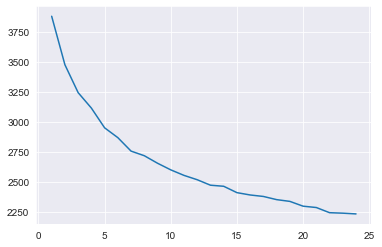

In [16]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans


metrics = []
MAX_CLUSTERS = 25
for cluster_num in range(1, MAX_CLUSTERS):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=99).fit(x_train)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            x_train[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)


D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

# Обучение моделей

## AffinityPropagation

In [10]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score

model =  AffinityPropagation().fit(x_train)

y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

#adj_train = adjusted_mutual_info_score(y_pred_train, y_train)
#adj_valid = adjusted_mutual_info_score(y_pred_valid, y_valid)

#print("ADJ train: %.2f" %adj_train)
#print("ADJ valid: %.2f" %adj_valid)

## AgglomerativeClustering

In [11]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score

model =  AffinityPropagation().fit(x_train)

y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

#adj_train = adjusted_mutual_info_score(y_pred_train, y_train)
#adj_valid = adjusted_mutual_info_score(y_pred_valid, y_valid)

#print("ADJ train: %.2f" %adj_train)
#print("ADJ valid: %.2f" %adj_valid)
y_pred_train

/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(
/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:528: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  warnings.warn(
/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:528: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  warnings.warn(


array([-1, -1, -1, ..., -1, -1, -1])

## Birch

In [12]:
from sklearn.cluster import Birch
from sklearn.metrics import adjusted_mutual_info_score

model =  Birch(n_clusters=6).fit(x_train)

y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

#y_pred_train
y_pred_valid

array([1, 0, 2, 0, 1, 1, 1, 1, 2, 3, 1, 0, 0, 5, 3, 0, 0, 0, 3, 3, 0, 0,
       0, 0, 3, 0, 2, 3, 2, 0, 3, 0, 0, 1, 1, 0, 1, 3, 1, 0, 0, 0, 3, 2,
       3, 1, 2, 0, 1, 3, 3, 1, 1, 1, 0, 0, 0, 3, 3, 3, 1, 3, 1, 1, 3, 3,
       0, 0, 3, 2, 0, 0, 0, 3, 0, 0, 2, 3, 0, 1, 1, 3, 0, 3, 1, 0, 3, 0,
       0, 3, 1, 1, 0, 0, 0, 0, 3, 0, 2, 1, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0,
       3, 1, 2, 0, 3, 3, 3, 3, 1, 2, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 1, 3,
       0, 0, 3, 1, 0, 3, 3, 2, 1, 0, 3, 0, 0, 0, 1, 3, 1, 1, 0, 2, 1, 2,
       2, 3, 2, 3, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 3, 3,
       0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 2, 1, 1, 2, 0, 2,
       1, 0, 3, 2, 2, 3, 3, 0, 0, 1, 3, 1, 0, 2, 0, 3, 0, 0, 1, 0, 3, 3,
       1, 1, 4, 3, 1, 0, 0, 0, 3, 3, 0, 1, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0,
       0, 1, 2, 2, 0, 3, 1, 2, 0, 0, 0, 3, 0, 3, 1, 2, 1, 1, 3, 0, 1, 3,
       0, 1, 3, 1, 0, 2, 3, 0, 0, 3, 2, 3, 3, 3, 2, 0, 2, 1, 0, 1, 1, 0,
       2, 1, 3, 2, 1, 3, 1, 0, 0, 1, 3, 0, 3, 0, 0,

## DBSCAN

Алгоритм построения кластеров
следующий

1. Для каждой точки считаем, сколько у нее есть соседей в том радиусе, который указывали в параметрах (назовем число соседей $m$)
1. Каждая точка, у которой соседей достаточно много (т.е. $m \ge k$, которое мы тоже указывали в параметрах), будет считаться "внутри кластера" и называться опорной
1. Остальные точки поделим на две группы.
    1. Если соседей в том же радиусе у них мало, но среди этих соседей есть точка, которая "внутри кластера" (мы все такие нашли на предыдущем шаге) - это точка будет считаться лежащей на границе кластера
    1. Все остальные будут считаться выбросами
1. Теперь объединим точки в кластеры. Возьмем любую из опорных точек и объединим ее со всеми ее соседями, которые при этом тоже являются опорными. Так получается первый кластер. Будем повторять это для оставшихся опорных точек, формируя кластер за кластером, пока не опорные точки не закончатся

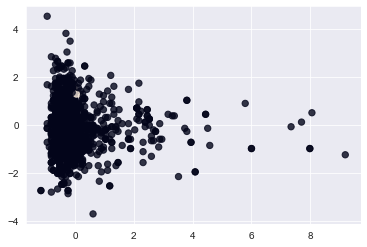

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_mutual_info_score

model = DBSCAN().fit(x_train)

labels= model.labels_

plt.scatter(x_train['residual sugar'], x_train['pH'], s=40, c=labels, marker='o', alpha=0.8, label='data')
plt.show()

## KMeans

Алгоритм основан на следующей идее: давайте разместим центры кластеров в случайных местах, а потом будем их двигать таким образом, чтобы “центры” совпали с областями, где точек больше всего.

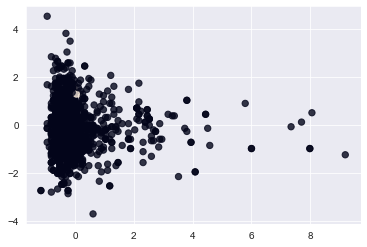

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score

model = KMeans(n_clusters=6, random_state=10).fit(x_train)

label = model.labels_

plt.scatter(x_train['residual sugar'], x_train['pH'], s=40, c=labels, marker='o', alpha=0.8, label='data')
plt.show()

## BisectingKMeans

In [15]:
from sklearn.cluster import BisectingKMeans
from sklearn.metrics import adjusted_mutual_info_score

model = BisectingKMeans(n_clusters=6, random_state=10).fit(x_train)

y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

#y_pred_train
y_pred_validv

ImportError: cannot import name 'BisectingKMeans' from 'sklearn.cluster' (/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/cluster/__init__.py)

## MiniBatchKMeans

In [16]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_mutual_info_score

model = MiniBatchKMeans(n_clusters=6, random_state=10).fit(x_train)

y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

#y_pred_train
y_pred_valid

array([2, 0, 1, 0, 2, 1, 1, 3, 2, 3, 1, 0, 0, 4, 2, 0, 3, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 0, 1, 0, 1, 3, 2, 0, 0, 0, 2, 1,
       3, 1, 2, 0, 0, 3, 3, 1, 3, 1, 0, 0, 0, 3, 0, 3, 0, 3, 3, 2, 2, 2,
       3, 0, 3, 1, 0, 0, 0, 3, 0, 0, 2, 3, 0, 2, 1, 3, 0, 3, 2, 0, 2, 0,
       0, 3, 1, 2, 0, 0, 3, 0, 2, 0, 2, 2, 2, 0, 3, 0, 0, 0, 2, 0, 1, 0,
       3, 1, 1, 0, 0, 3, 2, 3, 3, 1, 0, 3, 0, 2, 3, 0, 0, 3, 3, 0, 2, 3,
       0, 0, 3, 1, 0, 2, 3, 1, 2, 0, 3, 3, 0, 3, 3, 0, 5, 2, 0, 1, 3, 1,
       1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 1, 5, 1, 1, 0, 0, 0, 1, 3, 0, 0, 2,
       0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1,
       1, 0, 3, 1, 2, 3, 3, 0, 3, 2, 3, 1, 0, 1, 0, 3, 0, 2, 1, 0, 0, 3,
       2, 1, 5, 3, 1, 0, 0, 0, 3, 3, 0, 1, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 2, 2, 3, 1, 0, 0, 0, 3, 0, 3, 1, 5, 1, 2, 2, 3, 1, 3,
       0, 2, 2, 3, 0, 2, 3, 0, 0, 1, 1, 3, 2, 2, 2, 0, 1, 1, 0, 3, 3, 0,
       1, 2, 3, 1, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 3,

## MeanShift

In [17]:
from sklearn.cluster import MeanShift
from sklearn.metrics import adjusted_mutual_info_score

model = MeanShift(bandwidth=2).fit(x_train)

y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

#y_pred_train
y_pred_valid

array([ 1,  0, 41,  0,  0,  3,  3, 40, 40, 86,  1,  0,  0,  2,  0, 75, 81,
        0, 60, 75,  0,  0,  0,  0,  0,  0, 10,  0,  1, 82, 69, 81,  0,  1,
        1,  0,  1,  0,  1,  0,  0,  0,  0, 41, 46,  3,  1, 81,  5, 34,  1,
        1, 72,  1,  0,  5,  0, 47,  0, 69,  0,  9,  1,  1,  0,  0, 86,  0,
        0, 13,  0,  0,  0,  0,  0,  0,  1, 46,  0,  1,  1, 15,  0,  0,  1,
        0,  0, 75,  0, 33,  1,  1,  5, 82, 81,  0,  0,  0, 41,  1,  1,  0,
       33, 92,  0,  0,  0,  5,  1,  0,  0,  1, 31,  0,  0,  0,  0, 86, 21,
        8,  0, 86,  0,  0, 81, 12,  0,  0, 47, 90,  7, 69, 28,  0,  0,  1,
       92,  0, 47, 13,  1,  0,  0,  0,  0,  0, 33, 82,  6, 73,  0, 13, 59,
       41, 31,  4, 13,  0,  4,  5,  1,  1,  1, 13,  1, 24,  3,  1,  0,  5,
        0, 72,  1, 72,  0, 44, 58,  0,  0,  1,  5, 81,  0,  0,  0,  0,  0,
        3,  0,  0,  0,  1, 41,  1,  7,  1,  0,  1,  1, 81,  1, 41,  1, 33,
       33,  0, 81,  1, 44,  3,  0, 13,  0, 59, 12,  0, 15,  0,  0,  0, 73,
        1, 16,  0,  1, 86

## OPTICS

In [18]:
from sklearn.cluster import OPTICS
from sklearn.metrics import adjusted_mutual_info_score

model = OPTICS().fit(x_train)

y_pred_train = model.labels_
y_pred_valid = model.labels_

#y_pred_train
y_pred_valid

array([-1, 10, -1, ..., -1, 19, 28])